In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

In [20]:
data = pd.read_csv('./train.csv',encoding='gbk')
test_data = pd.read_csv('./testA.csv',encoding='gbk')

In [21]:
data.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014-07-01,1,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,2,2012-08-01,0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,2,2015-10-01,0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,1,2015-08-01,0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,29000.0,2,2016-03-01,0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [22]:
data.info(),test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

(None, None)

In [23]:
# 数字类型
data.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,799761.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799595.000000,8.000000e+05,799469.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.0,759730.000000,759730.000000,759730.000000,759730.000000,766761.000000,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,1.745982,258.535648,16.385758,18.284557,0.318239,696.204081,700.204226,11.598020,0.214915,0.134163,1.622871e+04,51.790734,24.998861,0.416953,0.019267,1754.113589,1.0,0.511932,3.642330,5.642648,5.642648,4.735641,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252013,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,2.367453,200.037446,11.036679,11.150155,0.880325,31.865995,31.866674,5.475286,0.606467,0.377471,2.245802e+04,24.516126,11.999201,0.493055,0.137464,7941.474040,0.0,1.333266,2.246825,3.302810,3.302810,2.949969,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,630.000000,634.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,0.000000,103.000000,8.000000,11.790000,0.000000,670.000000,674.000000,8.000000,0.000000,0.000000,5.944000e+03,33.400000,16.000000,0.000000,0.000000,0.000000,1.0,0.000000,2.000000,3.000000,3.000000,3.000000,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,0.000000,203.000000,14.000000,17.610000,0.000000,690.000000,694.000000,11.000000,0.000000,0.000000,1.113200e+04,52.100000,23.000000,0.000000,0.000000,1.000000,1.0,0.000000,3.000000,5.000000,5.000000,4.000000,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,4.000000,395.000000,22.000000,24.060000,0.000000,710.000000,714.000000,14.000000,0.000000,0.000000,1.973400e+04,70.700000,32.000000,1.000000,0.000000,5.000000,1.0,0.000000,5.000000,7.000000,7.000000,6.000000,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,13.000000,940.000000,50.000000,999.000000,39.000000,845.000000,850.000000,86.000000,86.000000,12.000000,2.904836e+06,892.300000,162.000000,1.000000,1.000000,61680.000000,1.0,51.000000,33.000000,63.000000,63.000000,49.000000,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [24]:
# 非数字类型
data.describe(include='object')

,grade,subGrade,employmentLength,issueDate,earliesCreditLine
count,800000,800000,753201,800000,800000
unique,7,35,11,139,720
top,B,C1,10+ years,2016-03-01,Aug-2001
freq,233690,50763,262753,29066,5567


In [25]:
data.isDefault.value_counts()

0    640390
1    159610
Name: isDefault, dtype: int64

# 发现缺失值

In [26]:
# 统计缺失值数量
data.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  1
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
policyCode                0
n0                    40270
n1                    40270
n2                    40270
n3                  

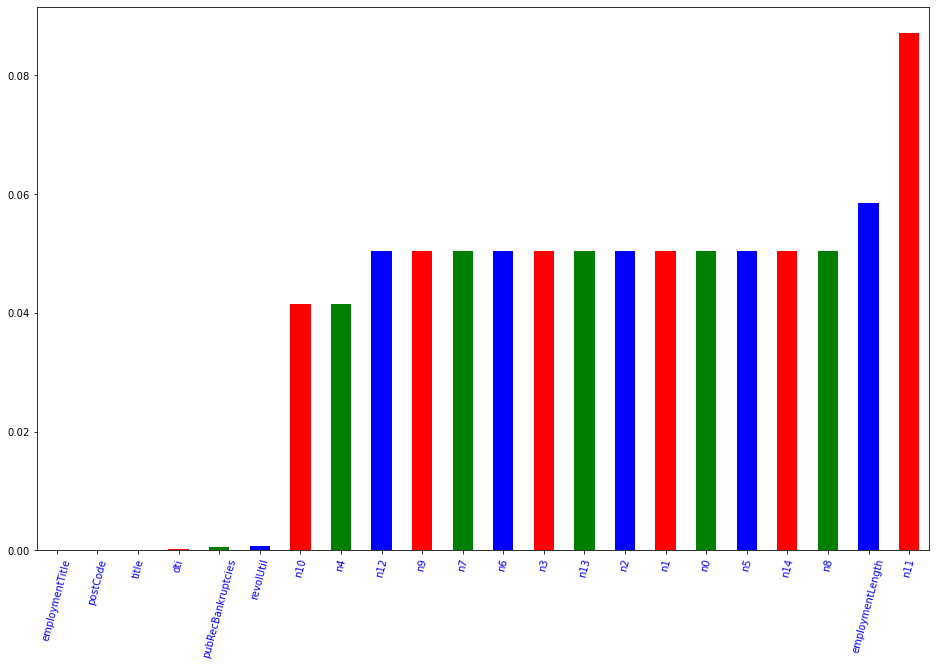

In [27]:
# nan可视化
plt.figure(figsize=(16, 10))
missing = data.isnull().sum()
missing = missing[missing > 0]/800000
missing.sort_values(inplace=True)
missing.plot.bar(rot=0,color=['r','g','b'])
plt.xticks(color='blue',rotation=75)
plt.show()

In [28]:
# 把这里大于4%的字段所在的行删除
data.dropna(axis=0,subset = missing[missing>0.04].index,inplace=True)

In [29]:
# 统计缺失值数量
data.isnull().sum()

id                      0
loanAmnt                0
term                    0
interestRate            0
installment             0
grade                   0
subGrade                0
employmentTitle         1
employmentLength        0
homeOwnership           0
annualIncome            0
verificationStatus      0
issueDate               0
isDefault               0
purpose                 0
postCode                1
regionCode              0
dti                    12
delinquency_2years      0
ficoRangeLow            0
ficoRangeHigh           0
openAcc                 0
pubRec                  0
pubRecBankruptcies      0
revolBal                0
revolUtil             445
totalAcc                0
initialListStatus       0
applicationType         0
earliesCreditLine       0
title                   0
policyCode              0
n0                      0
n1                      0
n2                      0
n3                      0
n4                      0
n5                      0
n6          

# 合并测试集

In [30]:
a = list(data.columns.values)
a.remove('isDefault')

In [31]:
x = data[a]
y = data['isDefault']

In [32]:
temp = x.append(test_data)

In [33]:
temp.shape

(886654, 46)

In [34]:
data.shape

(686654, 47)

In [35]:
temp.isnull().sum()[temp.isnull().sum()>0].index

Index(['employmentTitle', 'employmentLength', 'postCode', 'dti',
       'pubRecBankruptcies', 'revolUtil', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5',
       'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

In [36]:
temp.loc[:,temp.isnull().sum()[temp.isnull().sum()>0].index].head()

,employmentTitle,employmentLength,postCode,dti,pubRecBankruptcies,revolUtil,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,320.0,2 years,137.0,17.05,0.0,48.9,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
2,31698.0,8 years,337.0,22.77,0.0,51.8,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,46854.0,10+ years,148.0,17.21,0.0,52.6,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
5,51727.0,7 years,512.0,17.14,0.0,31.1,12.0,1.0,2.0,2.0,1.0,1.0,48.0,2.0,3.0,2.0,19.0,0.0,0.0,0.0,0.0
6,180083.0,9 years,517.0,17.49,0.0,8.5,0.0,1.0,3.0,3.0,7.0,11.0,3.0,10.0,18.0,3.0,12.0,0.0,0.0,0.0,3.0


employmentLength做处理直接把后面years去掉

In [38]:
temp.employmentLength.value_counts()

10+ years    307615
2 years       84061
< 1 year      74291
3 years       74285
1 year        60858
5 years       57365
4 years       54837
6 years       42804
8 years       42275
7 years       41078
9 years       35443
Name: employmentLength, dtype: int64

In [39]:
temp.employmentLength.replace('< 1 year','0.1 years',inplace=True)
temp.employmentLength.replace('10+ years','10 years',inplace=True)
temp.employmentLength.replace('1 year','1 years',inplace=True)

In [40]:
temp.employmentLength.value_counts()

10 years     307615
2 years       84061
0.1 years     74291
3 years       74285
1 years       60858
5 years       57365
4 years       54837
6 years       42804
8 years       42275
7 years       41078
9 years       35443
Name: employmentLength, dtype: int64

In [41]:
temp2 = temp['employmentLength'].map(lambda x: str(x)[:-6])
temp2.value_counts()

10     307615
2       84061
0.1     74291
3       74285
1       60858
5       57365
4       54837
6       42804
8       42275
7       41078
9       35443
        11742
Name: employmentLength, dtype: int64

In [42]:
temp['employmentLength'] = temp2

In [43]:
temp.describe(include='object')

,grade,subGrade,employmentLength,issueDate,earliesCreditLine
count,886654,886654,886654,886654,886654
unique,7,35,12,138,715
top,B,C1,10,2016-03-01,Aug-2001
freq,258559,56443,307615,33110,6329


In [44]:
temp.employmentLength.replace('','10',inplace=True)

In [45]:
temp.employmentLength.value_counts()

10     319357
2       84061
0.1     74291
3       74285
1       60858
5       57365
4       54837
6       42804
8       42275
7       41078
9       35443
Name: employmentLength, dtype: int64

In [46]:
temp.employmentLength = temp.employmentLength.astype('float64')

# 填补缺失值

In [47]:
temp.isnull().sum()[temp.isnull().sum()>0].index

Index(['employmentTitle', 'postCode', 'dti', 'pubRecBankruptcies', 'revolUtil',
       'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10',
       'n11', 'n12', 'n13', 'n14'],
      dtype='object')

In [48]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(temp.loc[:,temp.isnull().sum()[temp.isnull().sum()>0].index])

SimpleImputer(strategy='most_frequent')

In [49]:
temp.loc[:,temp.isnull().sum()[temp.isnull().sum()>0].index] = imp.transform(temp.loc[:,temp.isnull().sum()[temp.isnull().sum()>0].index])

In [50]:
temp.isnull().sum()[temp.isnull().sum()>0].index

Index([], dtype='object')

# 数据类型转换

In [51]:
# 非数字类型
temp.describe(include='object')

,grade,subGrade,issueDate,earliesCreditLine
count,886654,886654,886654,886654
unique,7,35,138,715
top,B,C1,2016-03-01,Aug-2001
freq,258559,56443,33110,6329


In [52]:
for i in temp.describe(include='object').columns:
    print(temp[i].value_counts())

B    258559
C    252975
A    154962
D    131242
E     61621
F     21160
G      6135
Name: grade, dtype: int64
C1    56443
B4    55101
B5    54071
B3    53199
C2    51857
C3    50060
C4    49668
B2    49037
B1    47151
C5    44947
A5    42645
A4    33699
D1    33693
A1    29205
D2    29104
D3    25584
A3    24849
A2    24564
D4    23145
D5    19716
E1    15441
E2    14023
E3    12180
E4    10400
E5     9577
F1     6543
F2     4793
F3     4007
F4     3214
F5     2603
G1     2022
G2     1411
G3     1110
G4      842
G5      750
Name: subGrade, dtype: int64
2016-03-01    33110
2015-10-01    28940
2015-07-01    27856
2015-12-01    26296
2014-10-01    24900
2016-02-01    23359
2015-01-01    22595
2015-11-01    21980
2015-04-01    21810
2015-08-01    21059
2015-05-01    19979
2016-01-01    19205
2014-07-01    19078
2015-06-01    17765
2015-09-01    17061
2016-04-01    16234
2014-11-01    16162
2015-03-01    15741
2016-08-01    15339
2015-02-01    15031
2016-07-01    14846
2016-06-01    14392
2

Name: earliesCreditLine, dtype: int64


In [53]:
from sklearn.preprocessing import OrdinalEncoder

grade和subgrade有等级之分，转换成数字

In [54]:
enc_grade = OrdinalEncoder()
enc_grade.fit(temp.grade.values.reshape(-1, 1))
temp.grade = enc_grade.transform(temp.grade.values.reshape(-1, 1))

In [55]:
enc_subGrade = OrdinalEncoder()
enc_subGrade.fit(temp.subGrade.values.reshape(-1, 1))
temp.subGrade = enc_subGrade.transform(temp.subGrade.values.reshape(-1, 1))

In [56]:
temp.describe(include='object')

,issueDate,earliesCreditLine
count,886654,886654
unique,138,715
top,2016-03-01,Aug-2001
freq,33110,6329


In [57]:
import datetime

In [58]:
d1 = datetime.datetime.strptime('1900-01-01', '%Y-%m-%d')

In [59]:
issueDate_temp = temp.issueDate.map(lambda x:(datetime.datetime.strptime(x,'%Y-%m-%d') - d1).days)

In [60]:
d2 = datetime.datetime.strptime('Aug-1900', '%b-%Y')
d2

datetime.datetime(1900, 8, 1, 0, 0)

In [61]:
earliesCreditLine_temp = temp.earliesCreditLine.map(lambda x:(datetime.datetime.strptime(x,'%b-%Y') - d2).days)

In [62]:
temp.issueDate = issueDate_temp
temp.earliesCreditLine = earliesCreditLine_temp

In [63]:
temp.describe()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,886654.000000,886654.000000,886654.000000,886654.000000,886654.000000,886654.000000,886654.000000,886654.000000,886654.000000,886654.000000,8.866540e+05,886654.000000,886654.000000,886654.000000,886654.000000,886654.000000,886654.000000,886654.000000,886654.00000,886654.000000,886654.000000,886654.000000,886654.000000,8.866540e+05,886654.000000,886654.000000,886654.000000,886654.000000,886654.000000,886654.000000,886654.0,886654.000000,886654.000000,886654.000000,886654.000000,886654.000000,886654.000000,886654.000000,886654.000000,886654.000000,886654.000000,886654.000000,886654.000000,886654.000000,886654.000000,886654.000000
mean,512759.838690,14651.221982,3.491856,13.245033,444.634887,1.745133,10.690591,68873.232023,6.045835,0.609034,7.760742e+04,0.986807,42210.592511,1.720371,257.680377,16.395079,18.280048,0.323282,695.96276,699.962896,11.727668,0.211956,0.129706,1.623691e+04,51.755895,25.142606,0.394324,0.019218,36138.945017,1445.213918,1.0,0.515527,3.606450,5.536343,5.536343,4.631305,8.028826,8.679495,8.244125,14.456653,5.543177,11.690815,0.000806,0.003468,0.083577,2.144996
std,292817.342163,8755.305905,0.861273,4.798530,262.606682,1.295087,6.454146,103387.722492,3.684193,0.671780,7.254638e+04,0.767721,519.835989,2.334456,199.800727,11.045057,10.008845,0.885992,31.60064,31.601286,5.498220,0.611318,0.374720,2.207299e+04,24.426975,12.021667,0.488705,0.137292,2695.614371,7178.828508,0.0,1.339414,2.196584,3.186126,3.186126,2.802651,4.745548,7.447247,4.523392,8.007461,3.174791,5.476298,0.029971,0.062903,0.489209,1.823016
min,0.000000,500.000000,3.000000,5.310000,14.010000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000e+00,0.000000,39262.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,625.00000,629.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,15858.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,258032.500000,8000.000000,3.000000,9.710000,254.050000,1.000000,6.000000,647.000000,3.000000,0.000000,4.771050e+04,0.000000,41850.000000,0.000000,102.000000,8.000000,11.860000,0.000000,670.00000,674.000000,8.000000,0.000000,0.000000,6.057000e+03,33.500000,16.000000,0.000000,0.000000,34729.000000,0.000000,1.0,0.000000,2.000000,3.000000,3.000000,3.000000,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,516604.500000,12325.000000,3.000000,12.740000,381.040000,2.000000,10.000000,8474.500000,6.000000,1.000000,6.500000e+04,1.000000,42246.000000,0.000000,201.000000,14.000000,17.640000,0.000000,690.00000,694.000000,11.000000,0.000000,0.000000,1.128000e+04,52.100000,23.000000,0.000000,0.000000,36586.000000,0.000000,1.0,0.000000,3.000000,5.000000,5.000000,4.000000,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,774678.750000,20000.000000,3.000000,16.010000,589.220000,2.000000,14.000000,107099.750000,10.000000,1.000000,9.200000e+04,2.000000,42550.000000,4.000000,392.000000,22.000000,24.110000,0.000000,710.00000,714.000000,14.000000,0.000000,0.000000,1.990000e+04,70.500000,32.000000,1.000000,0.000000,37986.000000,5.000000,1.0,0.000000,5.000000,7.000000,7.000000,6.000000,10.000000,12.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,999999.000000,40000.000000,5.000000,30.990000,1715.420000,6.000000,34.000000,378351.000000,10.000000,5.000000,1.099920e+07,2.000000,43433.000000,13.000000,940.000000,50.000000,999.000000,39.000000,845.00000,850.000000,90.000000,86

# 数据保存出去

In [64]:
temp.to_csv('data.csv')

In [65]:
y.to_csv('label.csv')